# EXPLORATORY DATA ANAYSIS : RETAIL

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
X=np.array(data)[:,:-1]
y=np.array(data)[:,-1]
Z=data.drop(['Postal Code'],axis=1)

In [6]:
print(data.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [7]:
print(data.isna().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
print(data.corr())

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


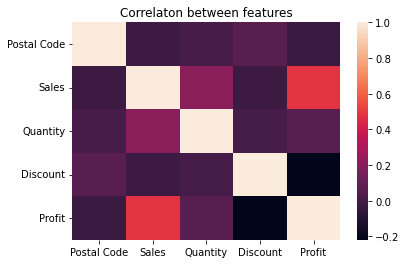

In [26]:
sns.heatmap(data.corr())
plt.title("Correlaton between features")
plt.show()

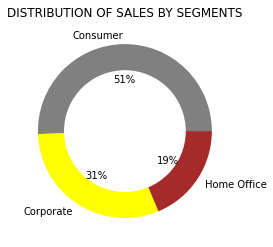

In [7]:
seg_sales=data.groupby('Segment')['Sales'].sum()
seg_sales=seg_sales.reset_index()
plt.pie(seg_sales['Sales'],labels=seg_sales['Segment'],autopct="%1.0f%%",colors=["grey","yellow","brown"])
plt.title("DISTRIBUTION OF SALES BY SEGMENTS")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

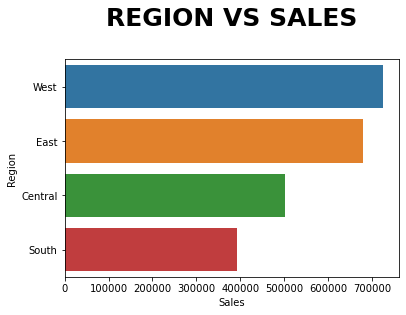

In [30]:
region_sales=data.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(10)
region_sales=region_sales.reset_index()
plt.title('REGION VS SALES\n' , fontweight='bold', fontsize=25);
sns.barplot(x=region_sales['Sales'],y=region_sales['Region'])
plt.show()

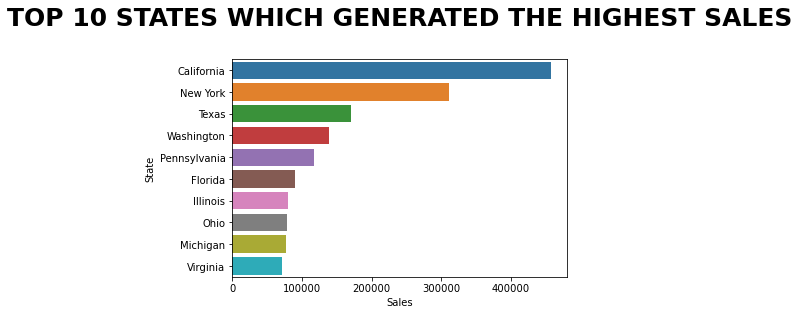

In [31]:
high_state_sales=data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
high_state_sales=high_state_sales.reset_index()
plt.title('TOP 10 STATES WHICH GENERATED THE HIGHEST SALES\n' , fontweight='bold', fontsize=25);
sns.barplot(x=high_state_sales['Sales'],y=high_state_sales['State'])
plt.show()

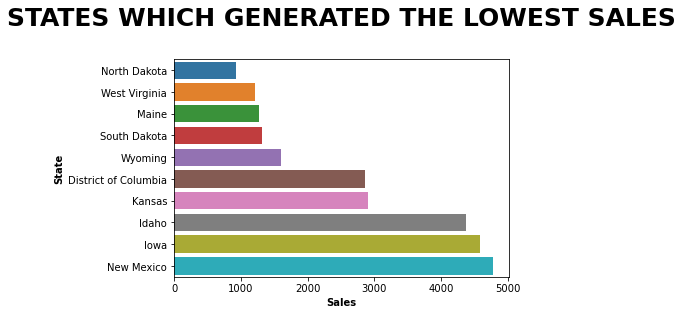

In [32]:
low_sales_states = data.groupby('State')['Sales'].sum().sort_values().head(10)
low_sales_states = low_sales_states.reset_index()
plt.title('STATES WHICH GENERATED THE LOWEST SALES\n' , fontweight='bold', fontsize=25);
plt.xlabel('Sales', fontweight='bold')
plt.ylabel('State', fontweight='bold') 
sns.barplot(x=low_sales_states['Sales'],y=low_sales_states['State'])
plt.show()

In [35]:
prof=Z.groupby('Category').sum().sort_values('Profit',ascending=False)
print(prof)

                       Sales  Quantity  Discount       Profit
Category                                                     
Technology       836154.0330      6939    244.40  145454.9481
Office Supplies  719047.0320     22906    947.80  122490.8008
Furniture        741999.7953      8028    368.89   18451.2728


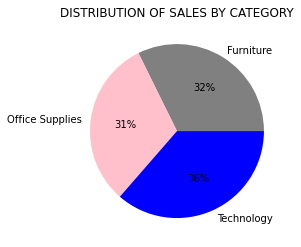

          Category  Discount
0        Furniture    368.89
1  Office Supplies    947.80
2       Technology    244.40


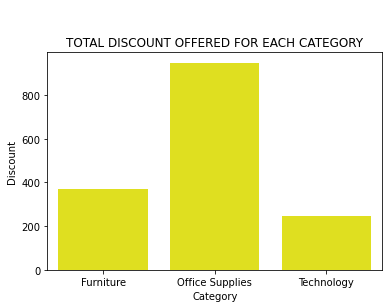

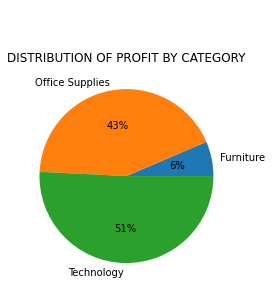

In [37]:
cat_sales=data.groupby('Category')['Sales'].sum()
cat_sales=cat_sales.reset_index()
plt.pie(cat_sales['Sales'],labels=cat_sales['Category'],autopct="%1.0f%%",colors=["grey","pink","blue"])
plt.title("DISTRIBUTION OF SALES BY CATEGORY")
plt.show()
cat_disc=data.groupby('Category')['Discount'].sum()
cat_disc=cat_disc.reset_index()
print(cat_disc)
sns.barplot(x=cat_disc['Category'],y=cat_disc['Discount'],color="yellow")
plt.title("\n\nTOTAL DISCOUNT OFFERED FOR EACH CATEGORY")
plt.show()
cat_prof=data.groupby('Category')['Profit'].sum()
cat_prof=cat_prof.reset_index()
plt.pie(cat_prof['Profit'],labels=cat_prof['Category'],autopct="%1.0f%%")
plt.title("\n\n\nDISTRIBUTION OF PROFIT BY CATEGORY")
plt.show()


In [38]:
df=data.drop('Postal Code',axis=1)
sub_sales=df.groupby('Sub-Category').sum().sort_values('Sales',ascending=False)

print(sub_sales)
sub_sales=sub_sales.reset_index()

                    Sales  Quantity  Discount      Profit
Sub-Category                                             
Phones        330007.0540      3289    137.40  44515.7306
Chairs        328449.1030      2356    105.00  26590.1663
Storage       223843.6080      3158     63.20  21278.8264
Tables        206965.5320      1241     83.35 -17725.4811
Binders       203412.7330      5974    567.00  30221.7633
Machines      189238.6310       440     35.20   3384.7569
Accessories   167380.3180      2976     60.80  41936.6357
Copiers       149528.0300       234     11.00  55617.8249
Bookcases     114879.9963       868     48.14  -3472.5560
Appliances    107532.1610      1729     77.60  18138.0054
Furnishings    91705.1640      3563    132.40  13059.1436
Paper          78479.2060      5178    102.60  34053.5693
Supplies       46673.5380       647     14.60  -1189.0995
Art            27118.7920      3000     59.60   6527.7870
Envelopes      16476.4020       906     20.40   6964.1767
Labels        

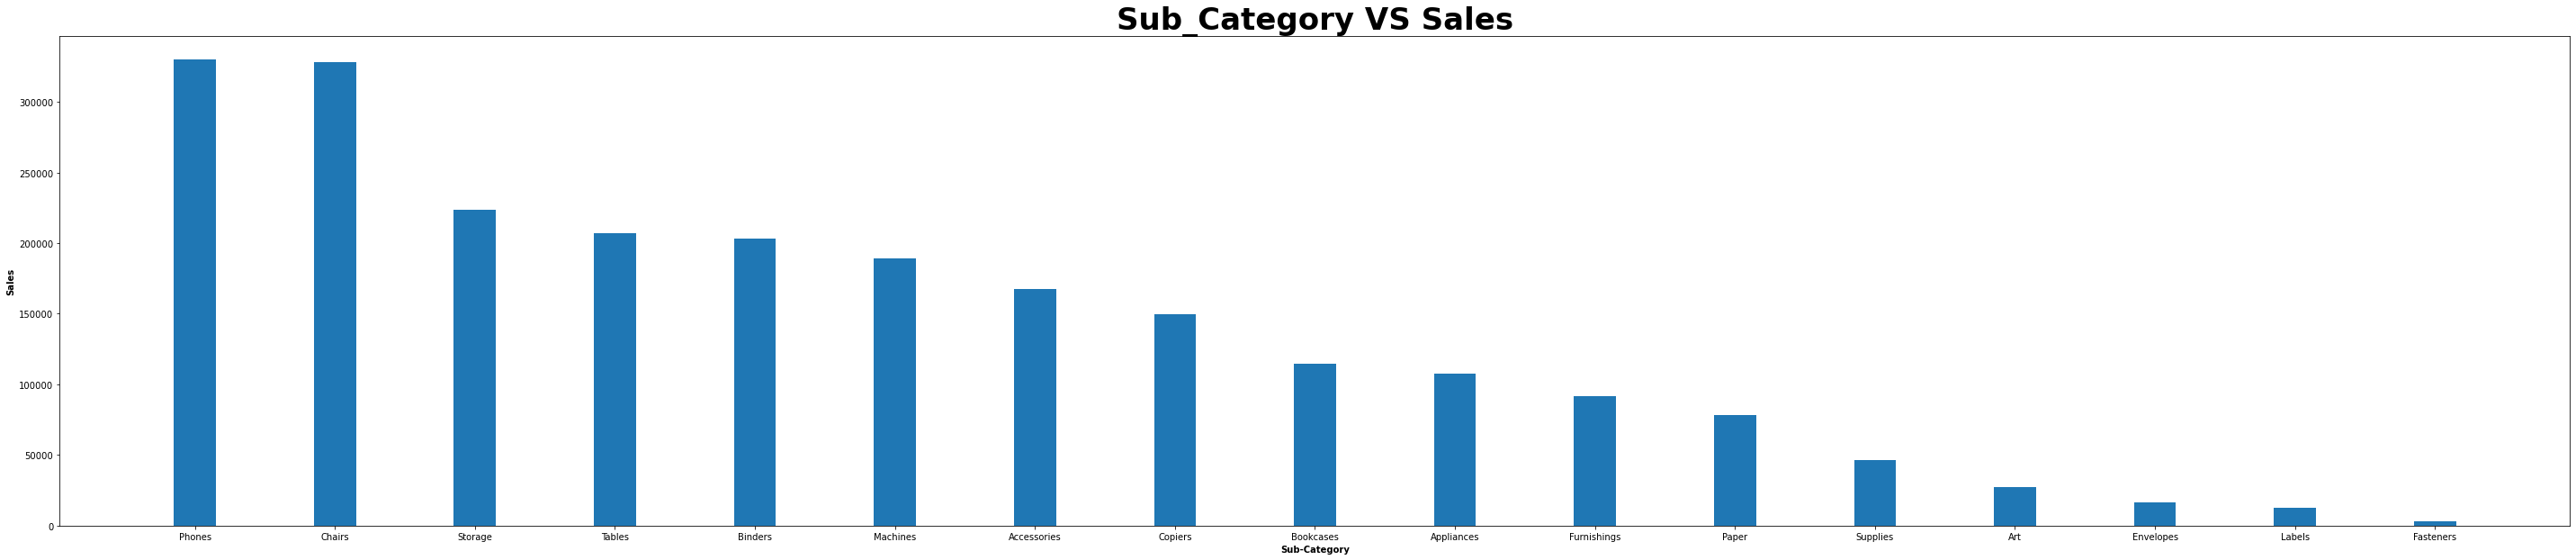

In [39]:
plt.figure(figsize=(50,10))
plt.xlabel('Sub-Category',fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.title('Sub_Category VS Sales',fontweight='bold',fontsize=34)
plt.bar(sub_sales['Sub-Category'],sub_sales['Sales'],width=0.3)
plt.show()

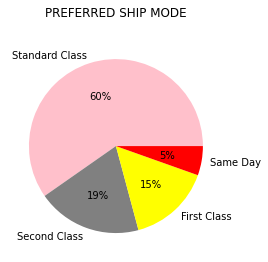

In [44]:
shipmode=data["Ship Mode"].value_counts().reset_index(name="Count")
plt.pie(shipmode['Count'],labels=shipmode['index'],colors=["pink","grey","yellow","red"],autopct="%1.0f%%")
plt.title("PREFERRED SHIP MODE\n")
plt.show()


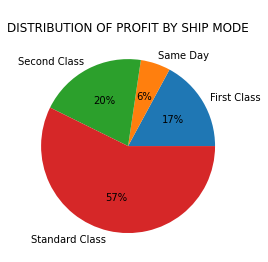

In [45]:
ship_prof=data.groupby('Ship Mode')['Profit'].sum()
ship_prof=ship_prof.reset_index()
plt.pie(ship_prof['Profit'],labels=ship_prof['Ship Mode'],autopct="%1.0f%%")
plt.title("\nDISTRIBUTION OF PROFIT BY SHIP MODE")
plt.show()

# CONCLUSIONS: